<a href="https://colab.research.google.com/github/LandonPattison/CS4372/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: load csv from url https://raw.githubusercontent.com/LandonPattison/CS4372/main/Processed_S%26P.csv

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/LandonPattison/CS4372/main/Processed_S%26P.csv')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   Volume          1983 non-null   float64
 3   mom             1983 non-null   float64
 4   mom1            1982 non-null   float64
 5   mom2            1981 non-null   float64
 6   mom3            1980 non-null   float64
 7   ROC_5           1979 non-null   float64
 8   ROC_10          1974 non-null   float64
 9   ROC_15          1969 non-null   float64
 10  ROC_20          1964 non-null   float64
 11  EMA_10          1975 non-null   float64
 12  EMA_20          1965 non-null   float64
 13  EMA_50          1935 non-null   float64
 14  EMA_200         1785 non-null   float64
 15  DTB4WK          1984 non-null   float64
 16  DTB3            1984 non-null   float64
 17  DTB6            1984 non-null   f

In [ ]:
df = df[['Date', 'Close']]
df.head()


,Date,Close
0,2009-12-31,1115.099976
1,2010-01-04,1132.989990
2,2010-01-05,1136.520020
3,2010-01-06,1137.140015
4,2010-01-07,1141.689941


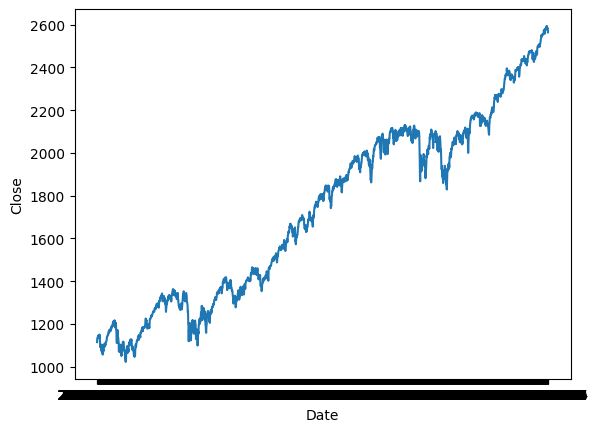

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import numpy as np
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming df is defined before this code block

# Convert 'Date' to ordinal
df['Date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda x: x.toordinal())

X = df[['Date_ordinal']]
y = df['Close']

def perform_grid_search(n_splits):
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Use the last split for visualization
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scaling features
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Grid search
    param_grid = {
        'loss': ['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        'penalty': [None, 'l2', 'l1', 'elasticnet'],
        'max_iter': [1000, 5000, 10000],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
        'random_state': [42]
    }

    grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    # Predictions and evaluation
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\nResults for n_splits = {n_splits}")
    print("Best Hyperparameters:", grid_search.best_params_)
    print("\nTraining MSE:", train_mse)
    print("Test MSE:", test_mse)
    print("\nTraining RMSE:", train_rmse)
    print("Test RMSE:", test_rmse)
    print("\nTraining R2 Score:", train_r2)
    print("Test R2 Score:", test_r2)

    # Plotting
    plt.figure(figsize=(15, 8))
    plt.plot(df['Date'].iloc[X_train.index], y_train, label='Training Data', color='blue')
    plt.plot(df['Date'].iloc[X_test.index], y_test, label='Test Data (Actual)', color='green')
    plt.plot(df['Date'].iloc[X_test.index], y_test_pred, label='Test Data (Predicted)', color='red', linestyle='--')
    plt.title(f'Stock Price Prediction (n_splits = {n_splits})')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Fitting 4 folds for each of 144 candidates, totalling 576 fits

Results for n_splits = 4
Best Hyperparameters: {'learning_rate': 'optimal', 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42}

Training MSE: 11477.209160817116
Test MSE: 14867.146891568043

Training RMSE: 107.13173741154912
Test RMSE: 121.93091032042713

Training R2 Score: 0.9058873702320474
Test R2 Score: 0.3916926589110983


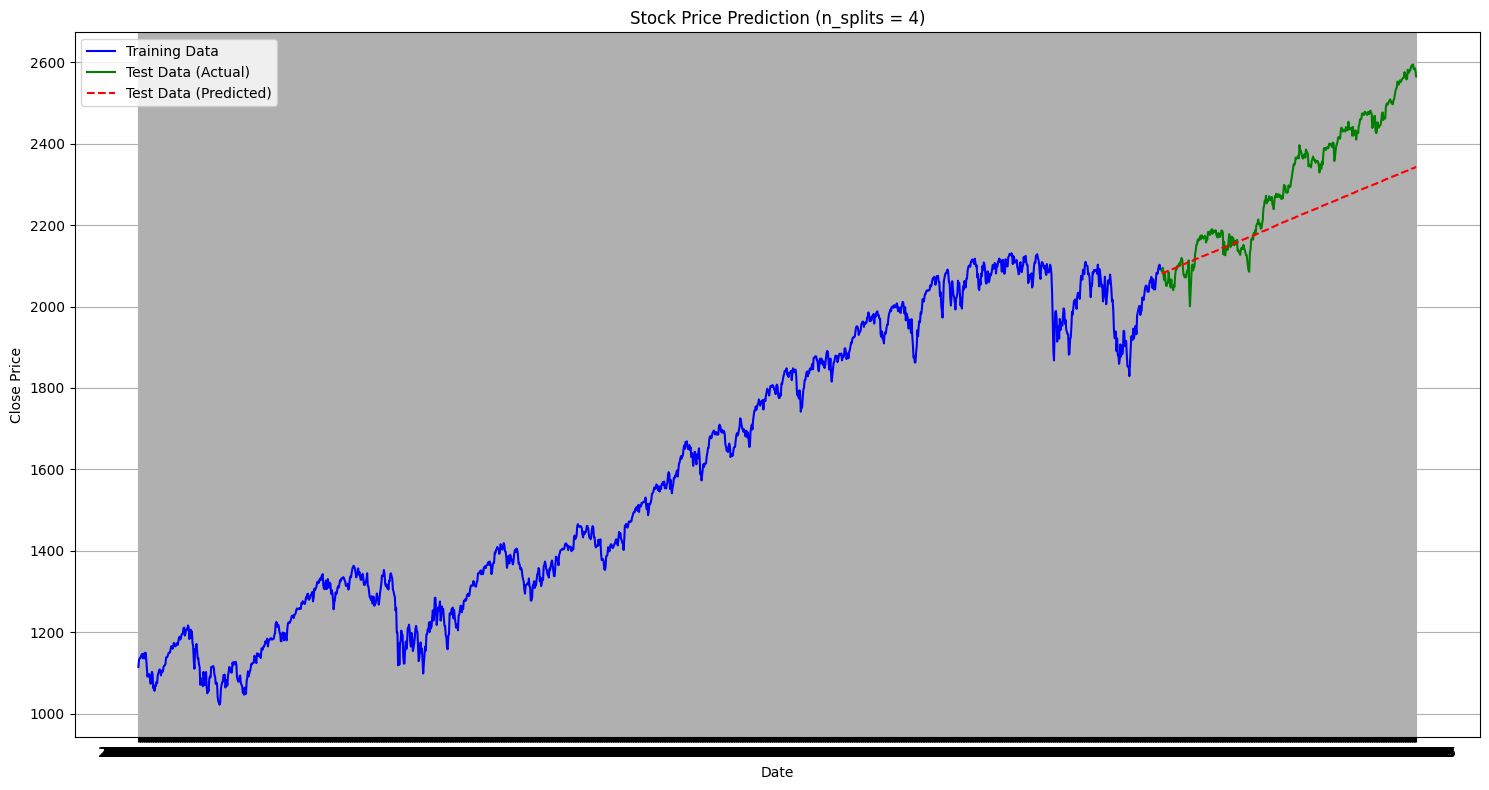

In [ ]:
perform_grid_search(4)

Fitting 8 folds for each of 144 candidates, totalling 1152 fits

Results for n_splits = 8
Best Hyperparameters: {'learning_rate': 'optimal', 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42}

Training MSE: 10499.874170574365
Test MSE: 30410.134618640273

Training RMSE: 102.46889367302823
Test RMSE: 174.38501833196645

Training R2 Score: 0.9239118471187586
Test R2 Score: -3.107269760262069


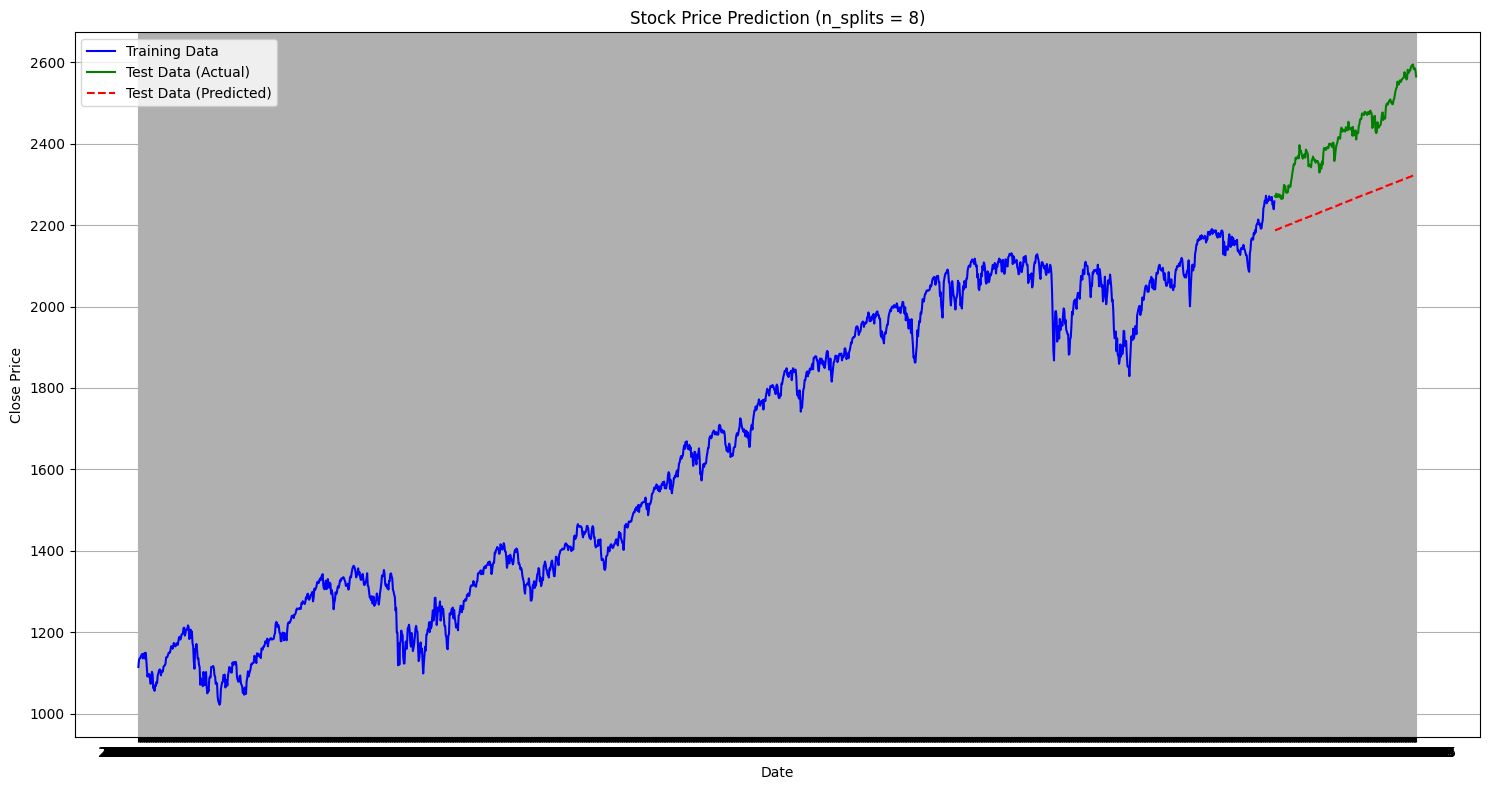

In [ ]:
perform_grid_search(8)


Fitting 2 folds for each of 144 candidates, totalling 288 fits

Results for n_splits = 2
Best Hyperparameters: {'learning_rate': 'adaptive', 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000, 'penalty': None, 'random_state': 42}

Training MSE: 7504.091513183931
Test MSE: 15834.054770574789

Training RMSE: 86.62615951999679
Test RMSE: 125.83344058943469

Training R2 Score: 0.9230247053423006
Test R2 Score: 0.5311566097616383


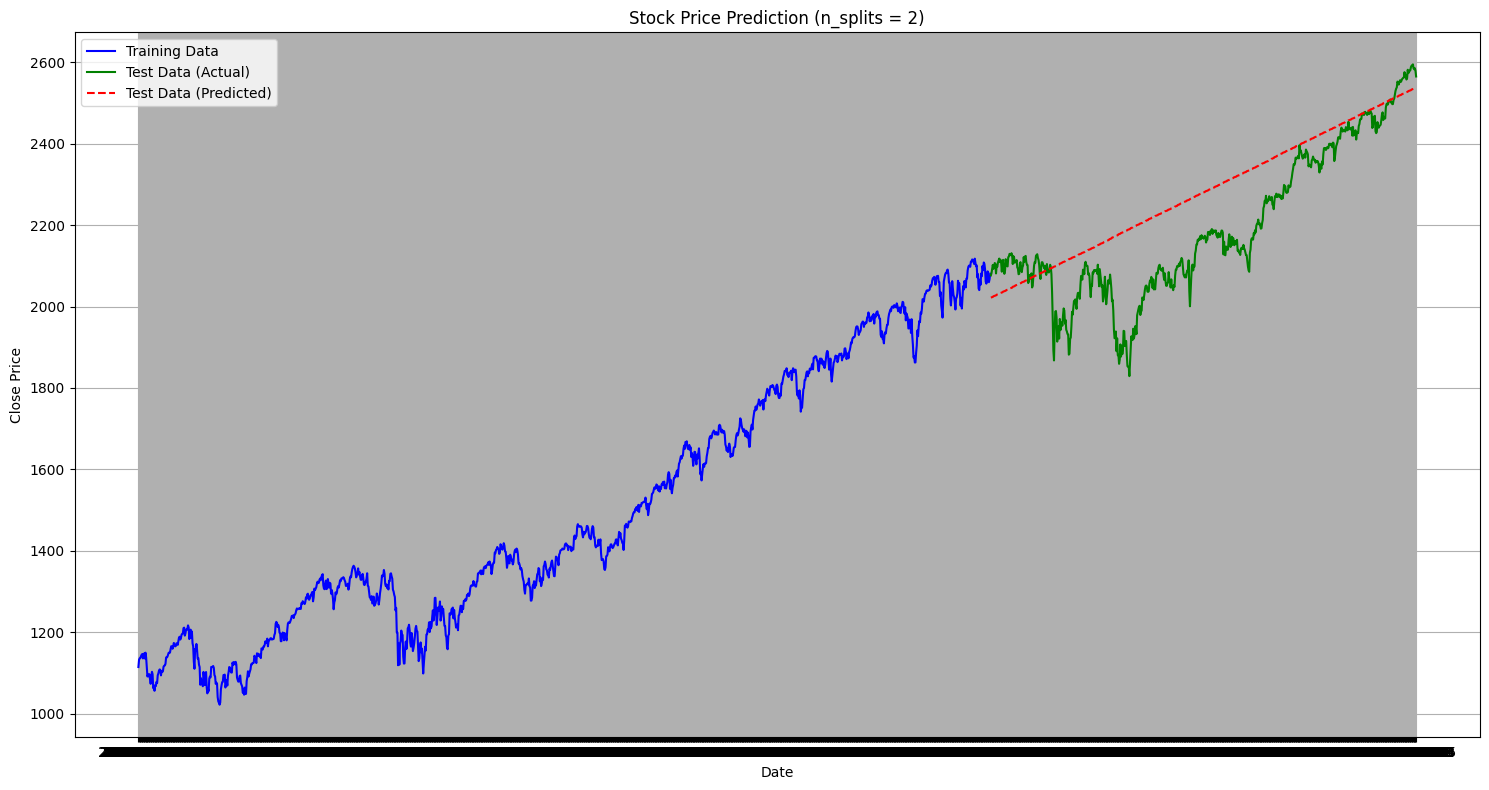

In [ ]:
perform_grid_search(2)

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def run_ols_model(n_splits=4):
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Note: statsmodels' OLS doesn't include an intercept by default, so we add it manually.
    X_sm = sm.add_constant(X)  # Adding a constant to the predictor

    # Use the last split from TimeSeriesSplit
    for train_index, test_index in tscv.split(X_sm):
        X_train_sm, X_test_sm = X_sm.iloc[train_index], X_sm.iloc[test_index]
        y_train_sm, y_test_sm = y.iloc[train_index], y.iloc[test_index]

    # Creating and fitting the OLS model
    ols_model = sm.OLS(y_train_sm, X_train_sm).fit()

    # Displaying the summary
    print(ols_model.summary())

    # Using the OLS model to make predictions
    y_train_pred_sm = ols_model.predict(X_train_sm)
    y_test_pred_sm = ols_model.predict(X_test_sm)

    # Calculating metrics for OLS model
    train_mse_sm = mean_squared_error(y_train_sm, y_train_pred_sm)
    test_mse_sm = mean_squared_error(y_test_sm, y_test_pred_sm)
    train_rmse_sm = np.sqrt(train_mse_sm)
    test_rmse_sm = np.sqrt(test_mse_sm)
    train_r2_sm = r2_score(y_train_sm, y_train_pred_sm)
    test_r2_sm = r2_score(y_test_sm, y_test_pred_sm)

    print("\nOLS Model Metrics:")
    print("\nTraining MSE:", train_mse_sm)
    print("Test MSE:", test_mse_sm)
    print("\nTraining RMSE:", train_rmse_sm)
    print("Test RMSE:", test_rmse_sm)
    print("\nTraining R2 Score:", train_r2_sm)
    print("Test R2 Score:", test_r2_sm)

    # Plotting the results
    plt.figure(figsize=(15, 8))
    plt.plot(df['Date'].iloc[X_train_sm.index], y_train_sm, label='Training Data', color='blue')
    plt.plot(df['Date'].iloc[X_test_sm.index], y_test_sm, label='Test Data (Actual)', color='green')
    plt.plot(df['Date'].iloc[X_test_sm.index], y_test_pred_sm, label='Test Data (Predicted)', color='red', linestyle='--')
    plt.title(f'Stock Price Prediction using OLS (n_splits = {n_splits})')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.976e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:00:05   Log-Likelihood:                -9487.9
No. Observations:                1588   AIC:                         1.898e+04
Df Residuals:                    1586   BIC:                         1.899e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.694e+05   2639.011   -139.978   

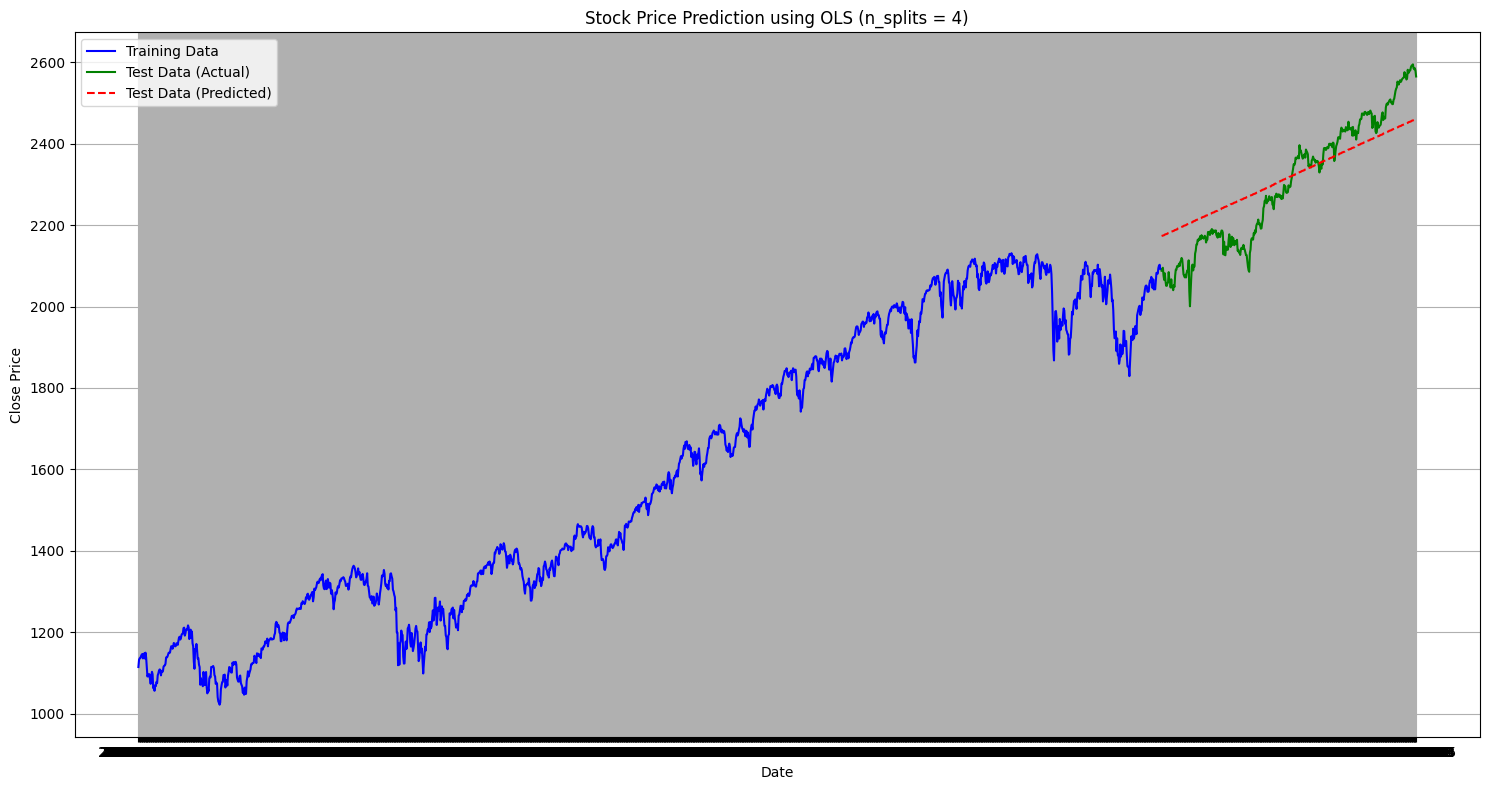

In [ ]:
run_ols_model(4)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.584e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:01:08   Log-Likelihood:                -7780.0
No. Observations:                1323   AIC:                         1.556e+04
Df Residuals:                    1321   BIC:                         1.557e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.959e+05   3157.677   -125.383   

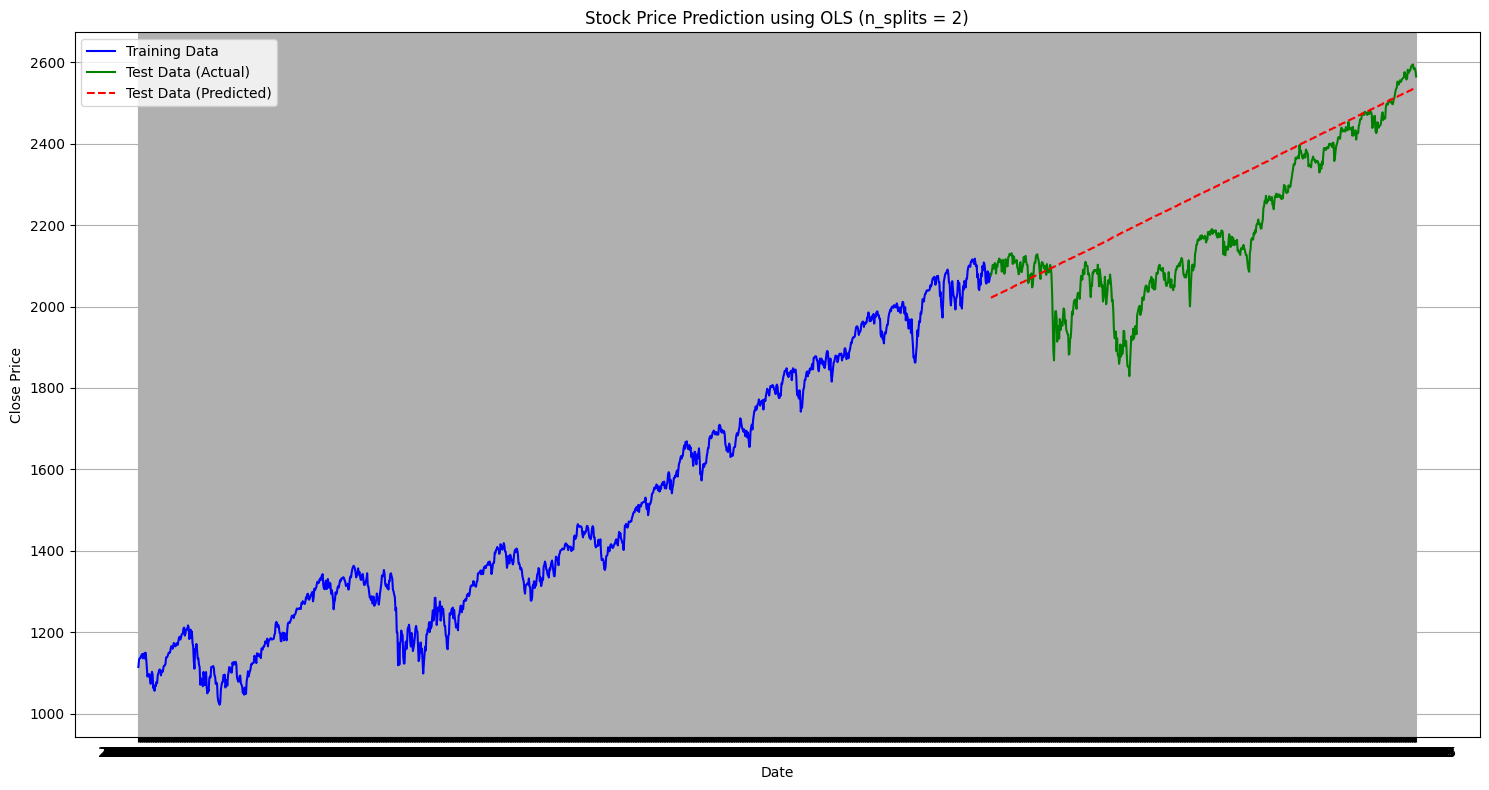

In [ ]:
run_ols_model(2)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 2.583e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:01:43   Log-Likelihood:                -10515.
No. Observations:                1764   AIC:                         2.103e+04
Df Residuals:                    1762   BIC:                         2.104e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.558e+05   2223.707   -159.988   

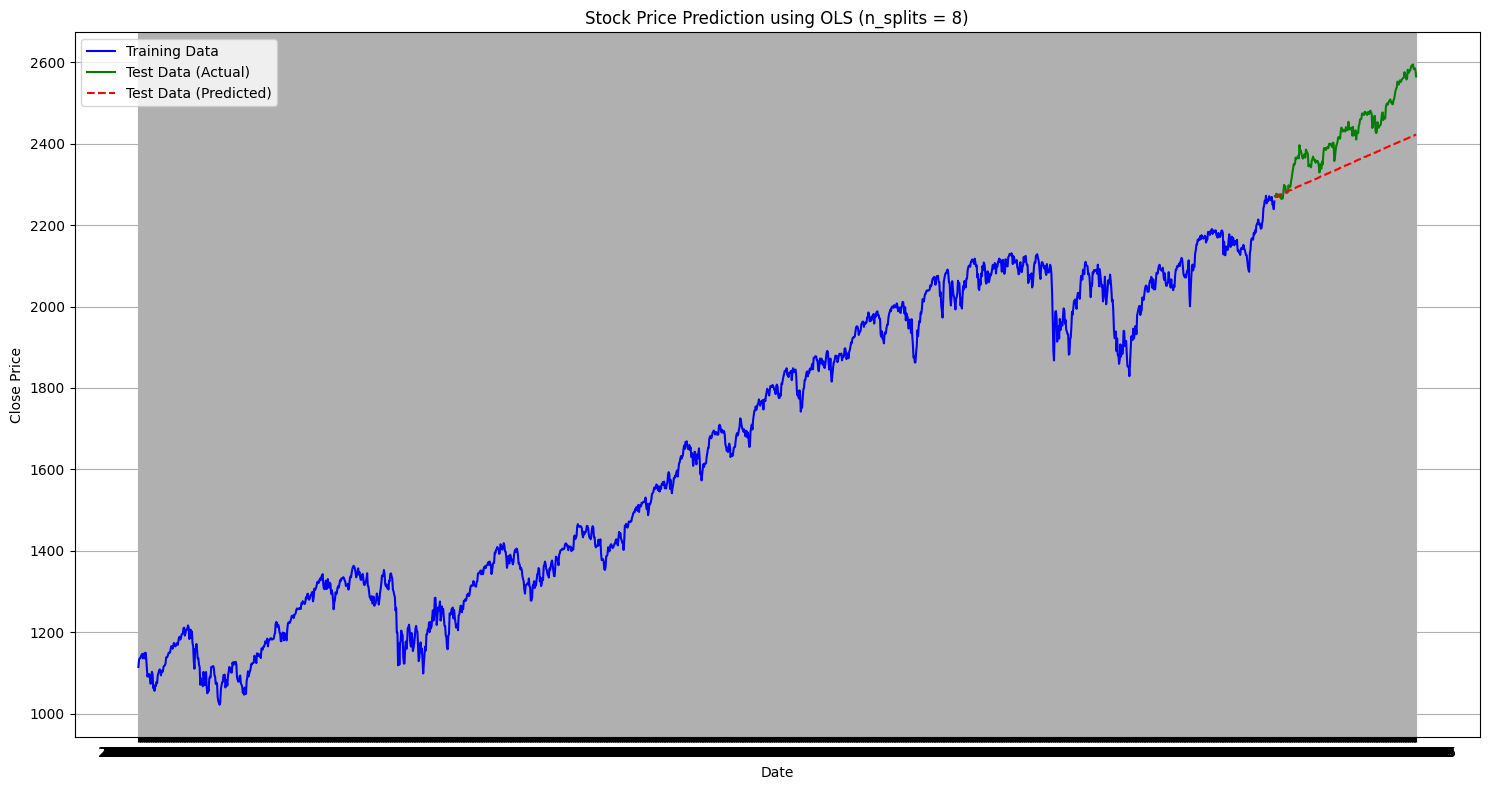

In [ ]:
run_ols_model(8)